In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import math 

In [117]:
df = pd.read_csv(r'C:\Users\harr1\Downloads\V0_BENT_LPI.csv')                                               #######
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229198 entries, 0 to 229197
Data columns (total 31 columns):
OBJECTID           229198 non-null int64
ROUNDID            229198 non-null int64
MISSIONID          229198 non-null object
REGION_NAME        229198 non-null object
ISLAND             229198 non-null object
SITEVISITID        229198 non-null int64
SITE               229198 non-null object
LATITUDE           229184 non-null float64
LONGITUDE          229184 non-null float64
REEF_ZONE          229198 non-null object
DEPTH_BIN          224864 non-null object
MIN_Z_M            209939 non-null float64
MAX_Z_M            209939 non-null float64
DATE_              229198 non-null object
OBS_YEAR           229198 non-null int64
LPITRANSECTRUN     229198 non-null int64
DIVER              229198 non-null object
MINDEPTH           180610 non-null float64
MAXDEPTH           182488 non-null float64
METHODCODE         229198 non-null int64
CALIBRATION        99078 non-null float64
TRANNUM

In [444]:
print(df.dtypes)

OBJECTID             int64
ROUNDID              int64
MISSIONID           object
REGION_NAME         object
ISLAND              object
SITEVISITID          int64
SITE                object
LATITUDE           float64
LONGITUDE          float64
REEF_ZONE           object
DEPTH_BIN           object
MIN_Z_M            float64
MAX_Z_M            float64
DATE_               object
OBS_YEAR             int64
LPITRANSECTRUN       int64
DIVER               object
MINDEPTH           float64
MAXDEPTH           float64
METHODCODE           int64
CALIBRATION        float64
TRANNUM              int64
LPI_SEG             object
BENTHICCODE         object
FAMILY              object
GENUS               object
CATEGORY_GENUS      object
BENTHICNAME         object
BENTHICCATEGORY     object
COMMON_NAME         object
COUNT                int64
dtype: object


In [30]:
                                                                                                            ######
df = df.drop('MINDEPTH', axis=1)
df = df.drop('MAXDEPTH', axis=1)
df = df.drop('CALIBRATION', axis = 1)
df = df.drop('MIN_Z_M', axis = 1)
df = df.drop('MAX_Z_M', axis = 1)
df = df.drop('OBJECTID', axis = 1)
df = df.drop('ROUNDID', axis = 1)
df = df.drop('TRANNUM', axis = 1)
df = df.drop('LPI_SEG', axis = 1)
df = df.drop('METHODCODE', axis = 1)
df = df[df['OBS_YEAR']!=2009]
#df = df[df['REGION_NAME']!='Main Hawaiian Islands']
#df = df[df['REGION_NAME']!='Northwestern Hawaiian Islands']
#df = df[df['DIVER']!='VB']
df = df[df['BENTHICCATEGORY'] == 'CORL']
df= df.dropna()
print (df.head(20))

   MISSIONID          REGION_NAME ISLAND  SITEVISITID    SITE  LATITUDE  \
1    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
3    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
4    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
5    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
8    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
10   OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
11   OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
13   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
18   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
20   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
23   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
24   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
25   OES0512  Mariana Arc

In [31]:
#Get dummies for island(might use), region and reef zone                                                            #####
df = pd.concat([df, df['FAMILY'].str.get_dummies(sep=',')], axis=1)
df = pd.concat([df, df['ISLAND'].str.get_dummies(sep=',')], axis=1)
df = pd.concat([df, df['REEF_ZONE'].str.get_dummies(sep=',')], axis=1)
df =pd.concat([df, df['REGION_NAME'].str.get_dummies(sep=',')], axis=1)
df = pd.concat([df, df['DIVER'].str.get_dummies(sep=',')], axis = 1)

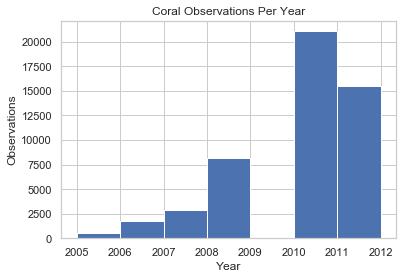

In [32]:
plt.hist(df['OBS_YEAR'], bins = 7)
plt.title('Coral Observations Per Year')
plt.xlabel('Year')
plt.ylabel('Observations')
plt.show()

In [45]:
#convert date from dd-ABREV-yyyy to yyyymmdd                                                                     ####

from datetime import datetime

df['Date']= [datetime.strptime(x, '%d-%b-%y').strftime('%Y-%m-%d') for x in df['DATE_']]

df['Month'] = [datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m') for x in df['Date']]

for x in df['Date']:
    x.replace("-", "")
    
for y in df['Month']:
    y.replace("-", "")
    


df_sorted = df.sort_values('Date')




In [46]:
df_sorted


,MISSIONID,REGION_NAME,ISLAND,SITEVISITID,SITE,LATITUDE,LONGITUDE,REEF_ZONE,DEPTH_BIN,DATE_,...,NNP,PSV,RDW,RO,VB,Date,Month,Obs/yr,Transect/day,Coral/day
1,OES0512,Mariana Archipelago,Guam,740,GUA-01,13.430050,144.637480,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
98,OES0512,Mariana Archipelago,Guam,741,GUA-10,13.473570,144.693520,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
100,OES0512,Mariana Archipelago,Guam,741,GUA-10,13.473570,144.693520,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
105,OES0512,Mariana Archipelago,Guam,741,GUA-10,13.473570,144.693520,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
11,OES0512,Mariana Archipelago,Guam,740,GUA-01,13.430050,144.637480,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
96,OES0512,Mariana Archipelago,Guam,741,GUA-10,13.473570,144.693520,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
8,OES0512,Mariana Archipelago,Guam,740,GUA-01,13.430050,144.637480,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
5,OES0512,Mariana Archipelago,Guam,740,GUA-01,13.430050,144.637480,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
4,OES0512,Mariana Archipelago,Guam,740,GUA-01,13.430050,144.637480,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35
3,OES0512,Mariana Archipelago,Guam,740,GUA-01,13.430050,144.637480,Forereef,Mid,03-OCT-05,...,0,0,0,0,0,2005-10-03,2005-10,511,4,35


In [338]:
sns.pairplot(df, hue='COUNT');

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x087B2A08> (for post_execute):


MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 11160x11160 with 1597 Axes>

In [47]:
df_sorted['Transect/day'] = df_sorted['LPITRANSECTRUN'].groupby(df_sorted['Date']).transform('nunique')                         ######
df_sorted['Coral/day'] = df_sorted['COUNT'].groupby(df_sorted['Date']).transform('sum')

print (df_sorted['Coral/day'])

1          35
98         35
100        35
105        35
11         35
96         35
8          35
5          35
4          35
3          35
10         35
93         62
92         62
89         62
87         62
84         62
83         62
81         62
79         62
77         62
76         62
55         62
49         62
94         62
47         62
52         62
44         62
74         23
71         23
58         23
         ... 
211918    190
211865    190
211790    190
211864    190
211855    190
211797    190
211798    190
211799    190
211800    190
211805    190
211806    190
211812    190
211816    190
211822    190
211824    190
211825    190
211832    190
211833    190
211834    190
211837    190
211838    190
211839    190
211840    190
211841    190
211842    190
211851    190
211852    190
211854    190
211863    190
211880    190
Name: Coral/day, Length: 49846, dtype: int64


In [48]:
## Transforming data based on samples taken during observations                                                 #####

## Since 2005-2008 data was collected every 50cm and 2010-2012 data collected every 20cm, we need to standardize the data
## 2005-2008 data multiplied by 2.5 as there were 2.5X fewer observations made per transect. Data divided by number 
## of transects taken per day to standardize how many corals found per m

df_2005 = df_sorted[df_sorted['Date']<='2008-12-31']
df_2010 = df_sorted[df_sorted['Date']>'2009-12-31']


df_2005['Coral/m']= (((df_2005['Coral/day']*2.5)/df_2005['Transect/day'])/25)
df_2010['Coral/m']= (((df_2010['Coral/day'])/df_2010['Transect/day'])/25)



C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [49]:
                                                                                                           #############
df_sorted= pd.concat([df_2005, df_2010], axis=0)
print (df_sorted['Coral/m'])

1         0.875000
98        0.875000
100       0.875000
105       0.875000
11        0.875000
96        0.875000
8         0.875000
5         0.875000
4         0.875000
3         0.875000
10        0.875000
93        1.550000
92        1.550000
89        1.550000
87        1.550000
84        1.550000
83        1.550000
81        1.550000
79        1.550000
77        1.550000
76        1.550000
55        1.550000
49        1.550000
94        1.550000
47        1.550000
52        1.550000
44        1.550000
74        1.150000
71        1.150000
58        1.150000
            ...   
211918    1.266667
211865    1.266667
211790    1.266667
211864    1.266667
211855    1.266667
211797    1.266667
211798    1.266667
211799    1.266667
211800    1.266667
211805    1.266667
211806    1.266667
211812    1.266667
211816    1.266667
211822    1.266667
211824    1.266667
211825    1.266667
211832    1.266667
211833    1.266667
211834    1.266667
211837    1.266667
211838    1.266667
211839    1.

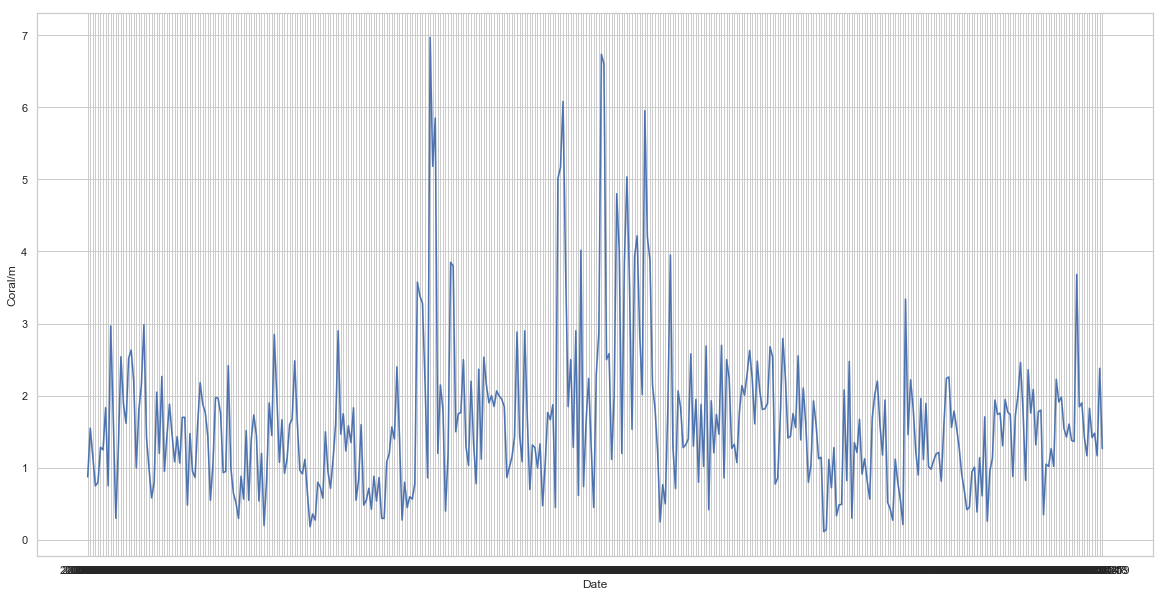

In [50]:

#df_sorted_yyyymm.groupby(['Date'])['COUNT'].sum().plot(color = 'orange', label = 'Coral/date')
#plt.legend(loc='upper left')
#plt.title('Coral per day 2005-2012 NO STANDARDIZATION')
#plt.show()
plt.figure(figsize=(20, 10))
#plt.plot(df_sorted_yyyymm['Date'], df_sorted_yyyymm['Coral/m'] )
ax = sns.lineplot(x= 'Date', y= 'Coral/m', data = df_sorted)
sns.axes_style("darkgrid")
#plt.title('Coral per m ADJ FOR TRANSECT per day 2005')
plt.show()

#plt.plot(df_2010['Date'], df_2010['Coral/m'] )
#plt.title('Coral per m ADJ FOR TRANSECT per day 2010')
#plt.show()


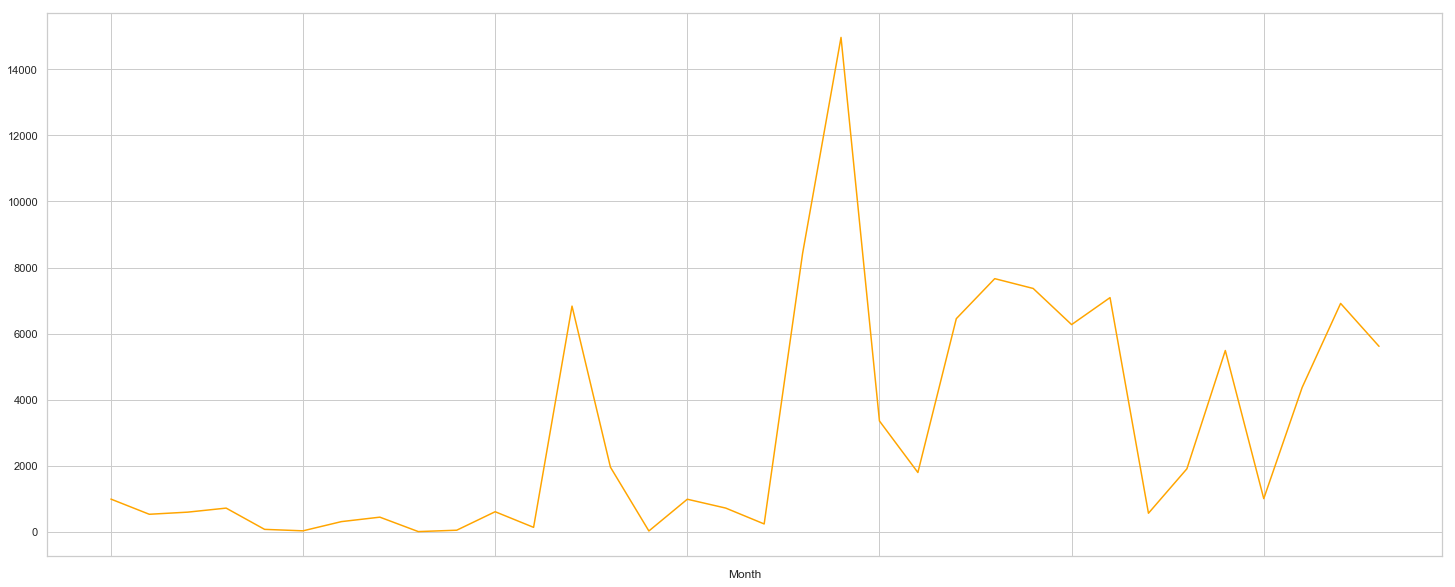

In [52]:
#df_2005.groupby(['Month'])['Coral/m'].sum().plot(color = 'orange', label = 'Coral/m/month')

#plt.title('Coral per month ADJ m 2005')
#plt.xticks(rotation=20)
#plt.show()



#df_2010.groupby(['Month'])['Coral/m'].sum().plot(color = 'orange', label = 'Coral/m/month')
#xticks = df['Month']
#plt.title('Coral per month ADJ m 2010')
#plt.show()

plt.figure(figsize=(25,10))

df_sorted.groupby(['Month'])['Coral/m'].sum().plot(color = 'orange', label = 'Coral/cm/month')
plt.show()

#ax = sns.lineplot(x="Month", y="Coral/cm", data=df)
#fig.autofmt_xdate()


In [ ]:
#plt.figure(figsize=(15,10))

#plt.subplot(3,2,1)
#plt.scatter(x=df_2005['Date'], y = df_2005['Count/day'])
#plt.title = ('CT/day NO TRANSECT ADJ  2005')

#plt.subplot(3,2,2)
#plt.scatter(x=df_2010['Date'], y = df_2010['Count/day'])
#plt.title = ('CT/day NO TRANSECT ADJ  2010')

#plt.show()

###############################

#sns.set_style("whitegrid")
#plt.figure(figsize=(15,10))

#plt.subplot(3,2,3)
#ax = sns.scatterplot(x='Date', y='Count/day', hue='REGION_NAME', data=df_2005)
#plt.title = ('CT/day NO TRANSECT ADJ WITH REGIONS 2005')

#plt.subplot(3,2,4)
#ax = sns.scatterplot(x='Date', y='Count/day', hue='REGION_NAME', data=df_2010)
#plt.title = ('CT/day NO TRANSECT ADJ WITH REGIONS 2010')
                        
#plt.show()
#################################

sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='REGION_NAME', data=df_2005)
plt.title = ('Coral/day WITH REGIONS 2005')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='REGION_NAME', data=df_2010)
#ax.autofmt_xdate()
plt.title = ('Coral/day WITH REGIONS 2010')


AttributeError: Unknown property xlabel

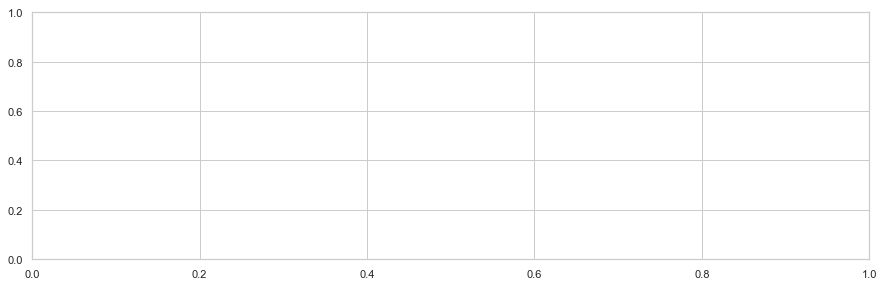

In [127]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='DIVER', data=df_2005, xlabel='Time')
plt.title = ('Coral/m/day with Divers 2005-2008')
ax.set(xticklabels=[])
plt.xlabel('Time')

plt.show()


sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

plt.subplot(2,1,2)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='DIVER', data=df_2010)
plt.title = ('Coral/m/day with Divers 2010-2012')
plt.xticks(rotation=70)

plt.show()


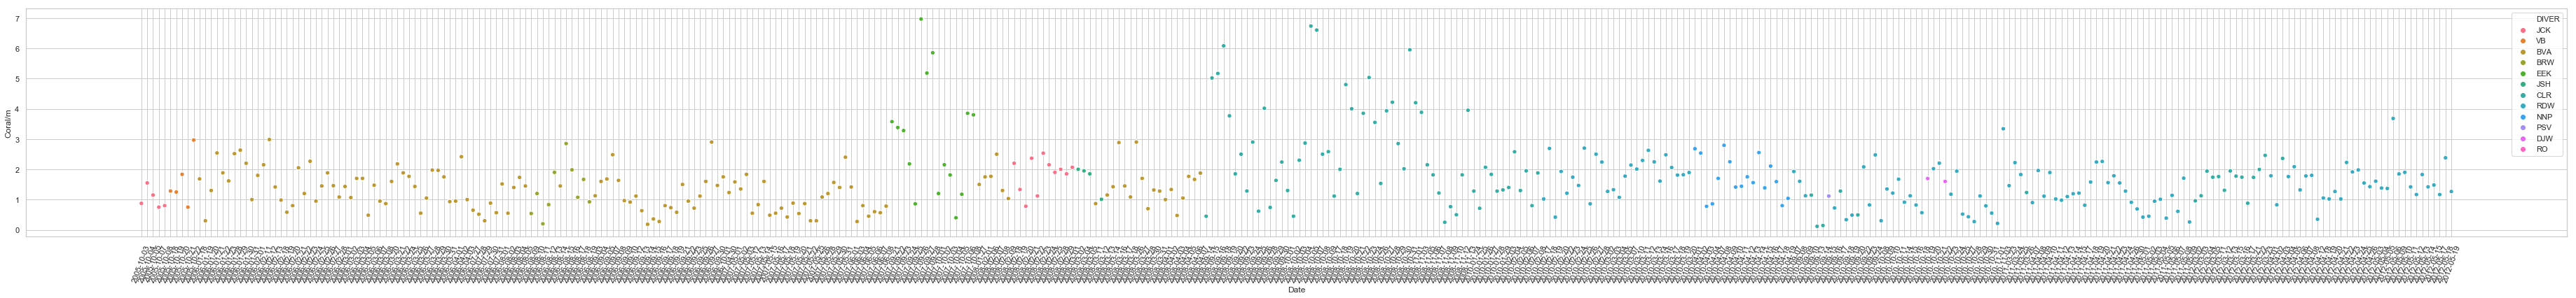

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(65,6))

ax = sns.scatterplot(x='Date', y='Coral/m', hue='DIVER', data=df_sorted)
plt.title = ('Coral/day WITH Divers 2010')
plt.xticks(rotation=70)
plt.show()


ValueError: Could not interpret input 'Coral/m'

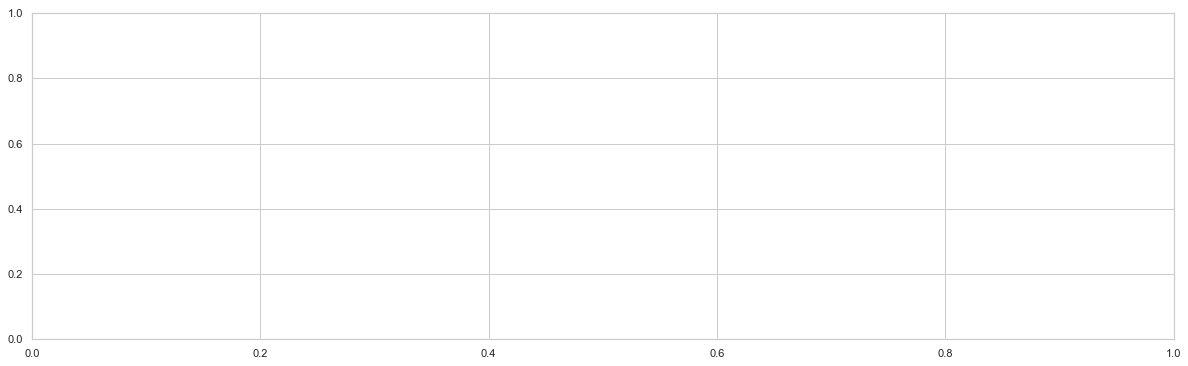

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(45,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='OBS_YEAR', y='Coral/m', hue='REGION_NAME', data=df)

plt.xticks(rotation=70)

sns.set_style("whitegrid")
plt.figure(figsize=(45,6))

plt.subplot(1,2,2)
ax = sns.scatterplot(x='Month', y='Coral/m', hue='REGION_NAME', data=df_sorted_yyyymm)

plt.xticks(rotation=70)

In [183]:
#Can't use non-numeric as a hue

import seaborn as sns
sns.set()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Date", y="Coral/m",
                     hue="FAMILY", 
                     palette=cmap, sizes=(10, 200),
                     data=df_2005)

TypeError: 'ListedColormap' object is not iterable

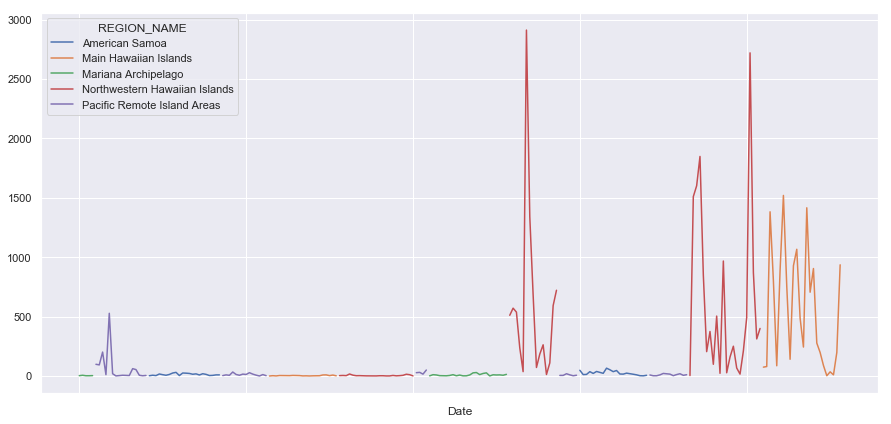

<Figure size 1080x504 with 0 Axes>

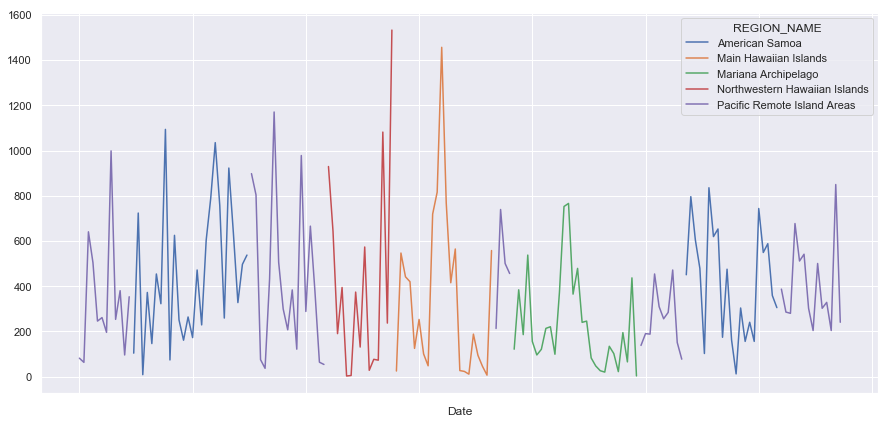

<Figure size 1080x504 with 0 Axes>

In [184]:
#Groupby families and plot that over time

#df_2010.groupby(['Date','Acroporidae']).sum()['COUNT'].plot(ax=ax)
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()

plt.figure(figsize=(15,7))
#df_2010.groupby(['Date','FAMILY']).sum()['COUNT'].unstack().plot(ax=ax)

#plt.show()

df_2005.groupby(['Date','REGION_NAME']).sum()['Coral/m'].unstack().plot(ax=ax, label='2005')
plt.show()

fig, ax = plt.subplots(figsize=(15,7))
plt.figure(figsize=(15,7))

df_2010.groupby(['Date','REGION_NAME']).sum()['Coral/m'].unstack().plot(ax=ax, label='2010')
plt.show()

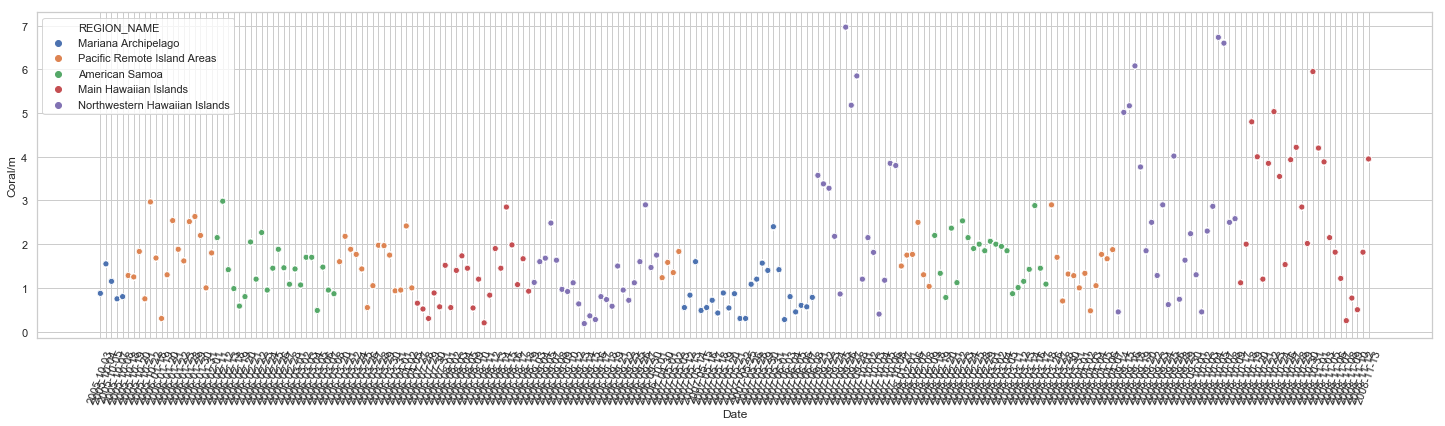

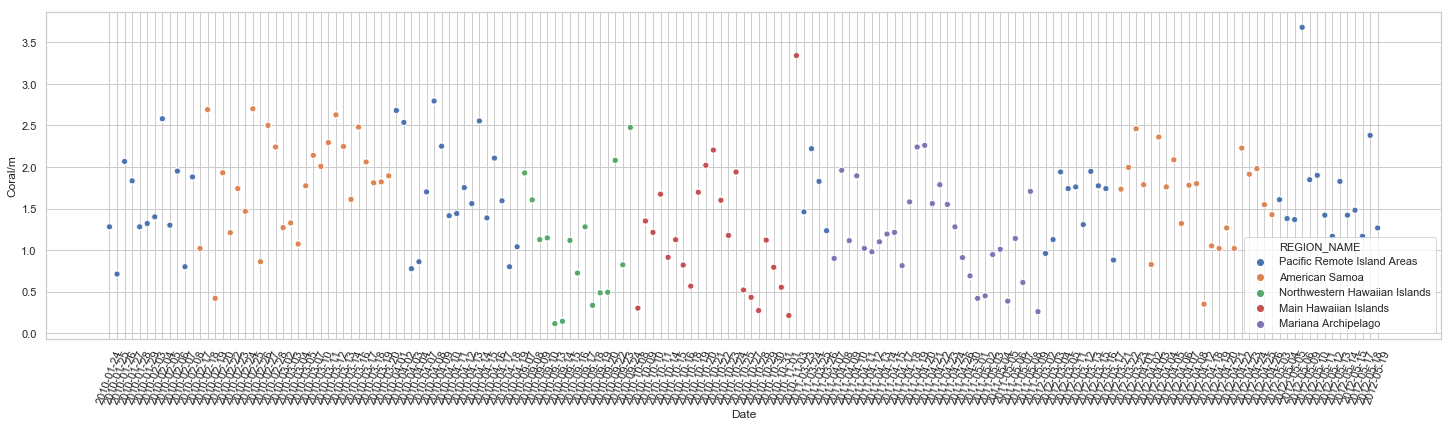

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(25,6))

ax = sns.scatterplot(x='Date', y='Coral/m', hue='REGION_NAME', data=df_2005)
plt.title = ('Coral/day WITH REGIONS 2010')
plt.xticks(rotation=70)
plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(25,6))


ax = sns.scatterplot(x='Date', y='Coral/m', hue='REGION_NAME', data=df_2010)
plt.title = ('Coral/day WITH REGIONS 2010')
plt.xticks(rotation=70)
plt.show()


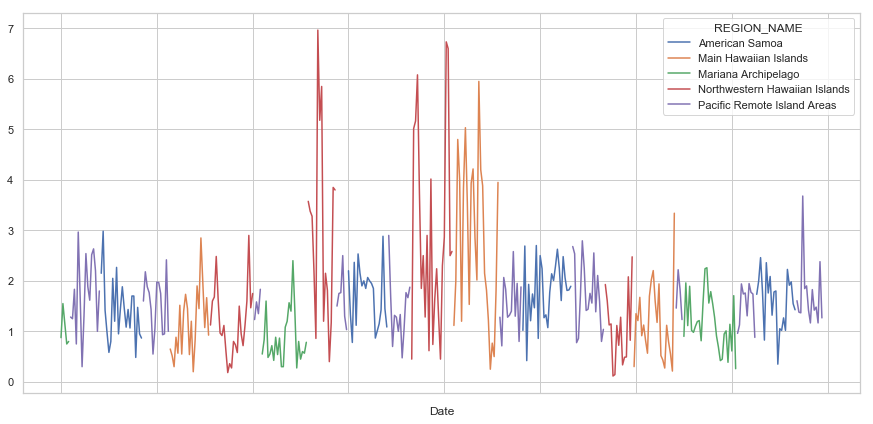

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
df_sorted.groupby(['Date','REGION_NAME'])['Coral/m'].mean().unstack().plot(ax=ax)
plt.show()

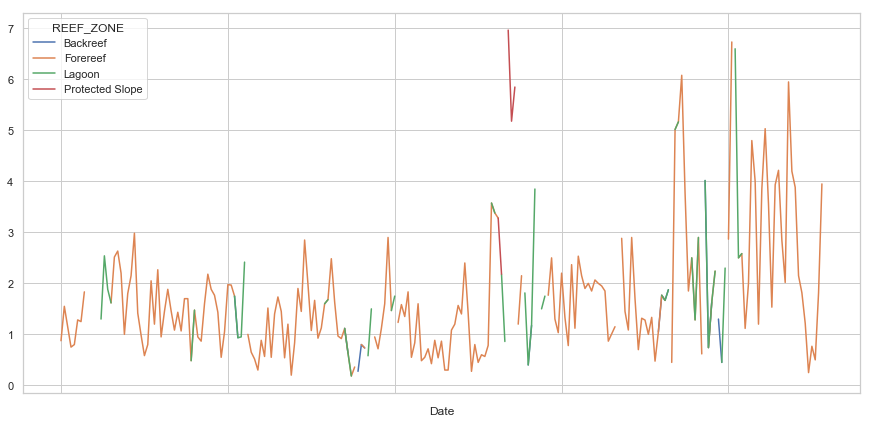

<Figure size 1080x504 with 0 Axes>

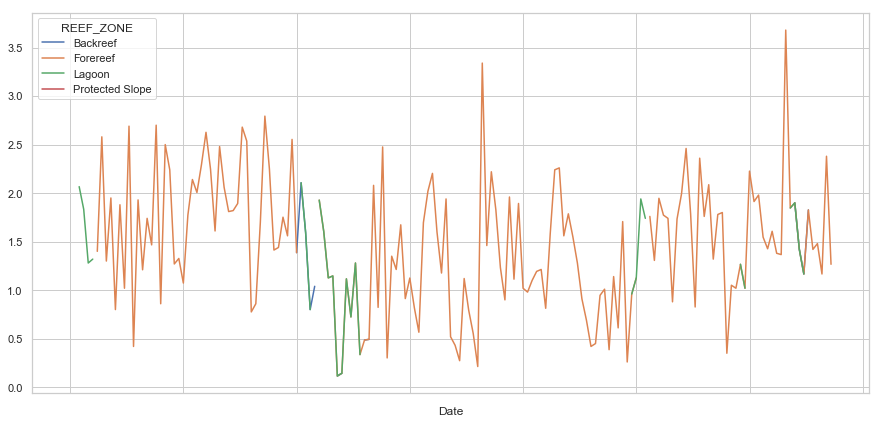

<Figure size 1080x504 with 0 Axes>

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
plt.figure(figsize=(15,7))

df_2005.groupby(['Date','REEF_ZONE']).mean()['Coral/m'].unstack().plot(ax=ax, label='2005')
plt.show()

fig, ax = plt.subplots(figsize=(15,7))
plt.figure(figsize=(15,7))

df_2010.groupby(['Date','REEF_ZONE']).mean()['Coral/m'].unstack().plot(ax=ax, label='2010')
plt.show()

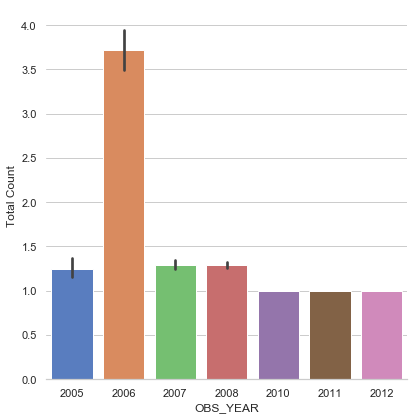

In [14]:

sns.set(style="whitegrid")

g = sns.catplot(x="OBS_YEAR", y="COUNT", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Count")

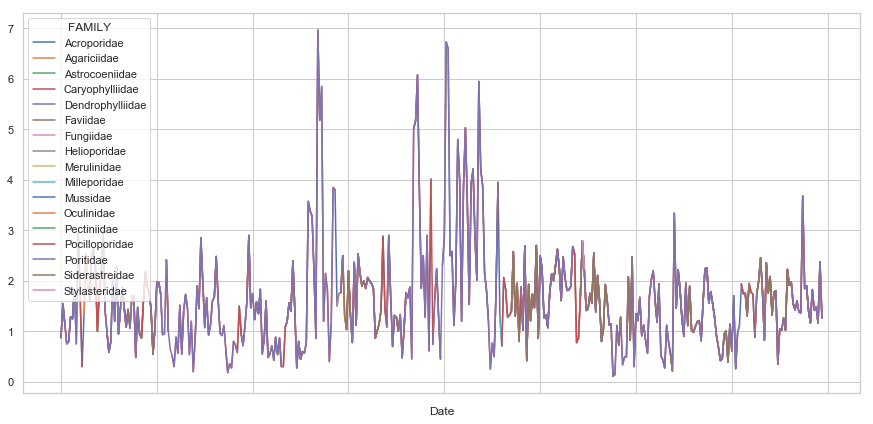

<Figure size 1080x504 with 0 Axes>

In [71]:
#family_series = df_2005.groupby(['Date', 'FAMILY'])['COUNT'].sum()

#print (family_series)
#df_2005.groupby(['Date', 'Acroporidae'])['Count'].sum()
#result = df.apply(lambda row: family_series[row['FAMILY']][row['date']] if row['FAMILY'] and row['date'] else float('NaN'))
fig, ax = plt.subplots(figsize=(15,7))
plt.figure(figsize=(15,7))
df_sorted.groupby(['Date','FAMILY']).mean()['Coral/m'].unstack().plot(ax=ax, label='upper right')
plt.show()

In [387]:
print (df.FAMILY.nunique())

17


In [156]:
print(df.dtypes)

MISSIONID                         object
REGION_NAME                       object
ISLAND                            object
SITEVISITID                        int64
SITE                              object
LATITUDE                         float64
LONGITUDE                        float64
REEF_ZONE                         object
DEPTH_BIN                         object
DATE_                             object
OBS_YEAR                           int64
DIVER                             object
BENTHICCODE                       object
FAMILY                            object
GENUS                             object
CATEGORY_GENUS                    object
BENTHICNAME                       object
BENTHICCATEGORY                   object
COMMON_NAME                       object
COUNT                              int64
Archipelago                        int32
Remote                             int32
Main HI                            int32
NW HI                              int32
Samoa           

In [88]:
df['OBS_YEAR'] = pd.to_numeric(df.OBS_YEAR, errors='coerce')
df['Date'] = pd.to_numeric(df.Date, errors='coerce')
df['Month'] = pd.to_numeric(df.Month, errors='coerce')

In [106]:
print (df.describe())

        SITEVISITID      LATITUDE     LONGITUDE      OBS_YEAR         COUNT  \
count  59476.000000  59476.000000  59476.000000  59476.000000  59476.000000   
mean    2694.150414     10.929137    -89.749675   2009.683385      1.135416   
std     1138.708191     14.468433    136.057561      1.576556      1.188139   
min      740.000000    -14.559639   -178.378433   2005.000000      1.000000   
25%     1816.000000      0.205030   -170.618900   2009.000000      1.000000   
50%     2479.000000     17.586930   -162.379560   2010.000000      1.000000   
75%     3448.000000     20.936400   -154.984085   2011.000000      1.000000   
max     5058.000000     28.454600    166.660472   2012.000000     39.000000   

             Obs/yr     Count/day  
count  59476.000000  59476.000000  
mean   12506.369662    251.707395  
std     6682.756871    124.033277  
min      511.000000      6.000000  
25%     8194.000000    158.000000  
50%     9837.000000    241.000000  
75%    21072.000000    335.000000  


AxesSubplot(0.125,0.125;0.775x0.755)


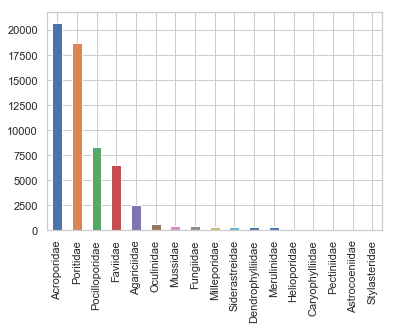

In [115]:
print (df['FAMILY'].value_counts().head(20).plot(kind = 'bar'))

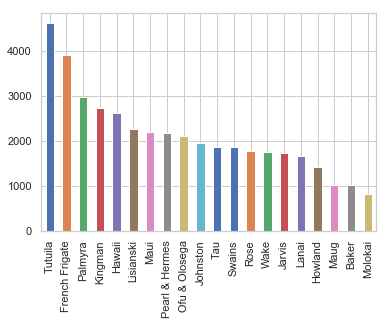

Number of Islands: 43


In [72]:
df['ISLAND'].value_counts().head(20).plot(kind='bar')
plt.show()
print ("Number of Islands:", df_sorted['ISLAND'].nunique())

In [81]:


sns.heatmap(df_sorted.corr())

TypeError: unhashable type: 'list'

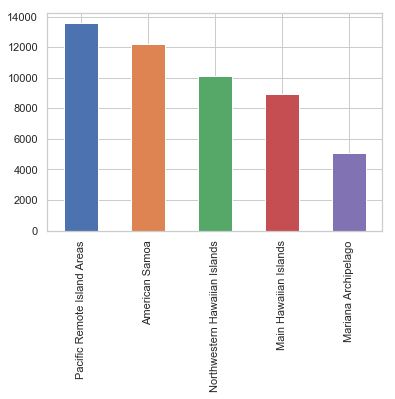

In [77]:

df['REGION_NAME'].value_counts().head(20).plot(kind='bar')


In [343]:
print (df['FAMILY'].unique())

['Acroporidae' 'Agariciidae' 'Pocilloporidae' 'Faviidae' 'Siderastreidae'
 'Poritidae' 'Merulinidae' 'Milleporidae' 'Dendrophylliidae' 'Fungiidae'
 'Mussidae' 'Oculinidae' 'Pectiniidae' 'Helioporidae' 'Astrocoeniidae'
 'Caryophylliidae' 'Stylasteridae']


In [35]:
df['REGION_NAME'].unique()

array(['Mariana Archipelago', 'Pacific Remote Island Areas',
       'Main Hawaiian Islands', 'Northwestern Hawaiian Islands',
       'American Samoa'], dtype=object)

## Feature Selection

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeRegressor



In [187]:
data = df[['OBS_YEAR',
           'LATITUDE', 
           'LONGITUDE', 
           #Reef zone
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef',
           #Families
           'Acroporidae', 'Agariciidae', 'Pocilloporidae', 'Faviidae', 'Siderastreidae',
 'Poritidae', 'Merulinidae', 'Milleporidae', 'Dendrophylliidae', 'Fungiidae',
 'Mussidae', 'Oculinidae', 'Pectiniidae', 'Helioporidae', 'Astrocoeniidae',
 'Caryophylliidae', 'Stylasteridae',
           #Divers
           'BVA', 'JCK', 'JSH', 'CLR', 'RDW', 'RO',
           #Islands
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           #Regions
           'Mariana Archipelago', 'Pacific Remote Island Areas',
       'Main Hawaiian Islands', 'Northwestern Hawaiian Islands',
       'American Samoa'
          ]]
target = df['Coral/m']
           

                

In [156]:
data_names=['OBS_YEAR',
           'LATITUDE', 
           'LONGITUDE', 
           #Reef zone
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef',
           #Families
           'Acroporidae', 'Agariciidae', 'Pocilloporidae', 'Faviidae', 'Siderastreidae',
 'Poritidae', 'Merulinidae', 'Milleporidae', 'Dendrophylliidae', 'Fungiidae',
 'Mussidae', 'Oculinidae', 'Pectiniidae', 'Helioporidae', 'Astrocoeniidae',
 'Caryophylliidae', 'Stylasteridae',
           #Divers
           'BVA', 'JCK', 'JSH', 'CLR', 'RDW', 'RO',
           #Islands
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           #Regions
           'Mariana Archipelago', 'Pacific Remote Island Areas',
       'Main Hawaiian Islands', 'Northwestern Hawaiian Islands',
       'American Samoa'
          ]

In [147]:
RandForest= ensemble.RandomForestRegressor()

RandForest.fit(data,target)

RandForest.feature_importances_
RandForest_ft_series = pd.Series(data=RandForest.feature_importances_, index=data.columns)
###################################33
sorted_series = RandForest_ft_series.sort_values(ascending = False)
sorted_series

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


BVA                              2.523126e-01
LATITUDE                         2.512179e-01
LONGITUDE                        2.217195e-01
OBS_YEAR                         1.806276e-01
CLR                              2.218054e-02
Laysan                           1.462313e-02
Rose                             8.689676e-03
Molokai                          7.596416e-03
Protected Slope                  4.404341e-03
Maug                             3.720406e-03
Lanai                            3.388121e-03
Pacific Remote Island Areas      2.853373e-03
Midway                           2.776988e-03
Hawaii                           2.450345e-03
Acroporidae                      2.434459e-03
Backreef                         1.836262e-03
Ofu & Olosega                    1.823146e-03
Lagoon                           1.282259e-03
Agrihan                          1.276258e-03
Sarigan                          1.270502e-03
Kauai                            1.261059e-03
Tau                              1

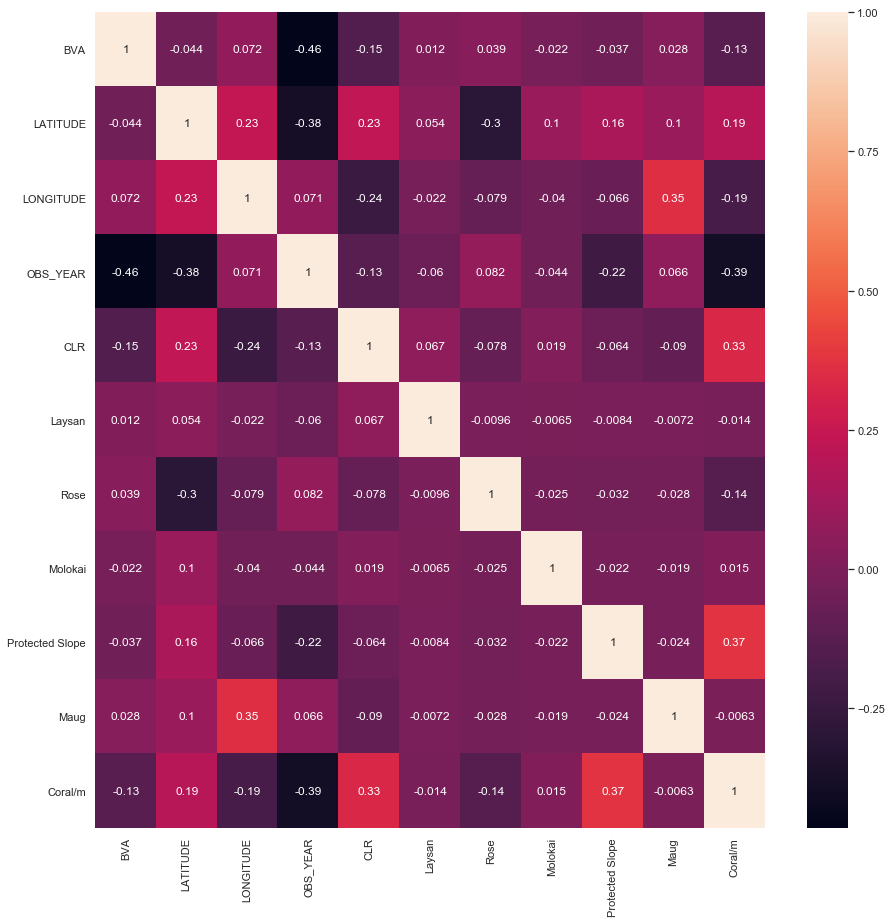

In [94]:

corrmat = df_sorted.corr()
features=['BVA', 'LATITUDE', 'LONGITUDE', 'OBS_YEAR', 'CLR', 'Laysan', 'Rose', 'Molokai', 'Protected Slope', 'Maug', 'Coral/m']
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df_sorted[features].corr(),annot=True)

## Linear Regressions: NW Hawaiian vs Pacific Remote

In [101]:
df_NWHI= df_sorted[df_sorted['REGION_NAME']=='Northwestern Hawaiian Islands']

print(df_NWHI['ISLAND'].unique())
print(df_NWHI['DIVER'].unique())

['Necker' 'French Frigate' 'Maro' 'Laysan' 'Pearl & Hermes' 'Midway'
 'Kure' 'Lisianski']
['BVA' 'EEK' 'CLR' 'PSV' 'RDW']


In [102]:

data_NW = df_NWHI[[
                'LATITUDE', 
                'LONGITUDE', 
    'OBS_YEAR',
    'French Frigate', 'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker', 'Pearl & Hermes',
    'BVA', 'EEK', 'CLR', 'RDW', 'PSV']]

target_NW = df_NWHI['Coral/m']

data_NW_names=['LATITUDE', 
                'LONGITUDE', 
    'OBS_YEAR',
    'French Frigate', 'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker', 'Pearl & Hermes',
    'BVA', 'EEK', 'CLR', 'RDW', 'PSV']
############################################

regr_NW = linear_model.LinearRegression()

regr_NW.fit(data_NW, target_NW)

cross_variable_NW=cross_val_score(regr_NW, data_NW, target_NW, cv=10)
print('Cross Validation: \n', cross_variable_NW)
print ('Mean:', np.mean(cross_variable_NW))
print ('std:',np.std(cross_variable_NW))
print('Coefficients: \n', regr_NW.coef_)
print('Intercept: \n', regr_NW.intercept_)
print ('Regression score: \n', regr_NW.score(data_NW,target_NW))

Cross Validation: 
 [-4.38728201e+22 -3.38878496e-02  3.06259507e-01  3.89589451e-01
 -9.36534916e-01  1.92574172e-01 -8.58611213e+00 -2.75823689e+01
 -7.49485056e-02 -3.97902225e-02]
Mean: -4.3872820097818003e+21
std: 1.31618460293454e+22
Coefficients: 
 [-6.09749680e+00 -2.42887025e+00 -1.30053692e+00 -3.12674800e+11
 -3.12674800e+11 -3.12674800e+11 -3.12674800e+11 -3.12674800e+11
 -3.12674800e+11 -3.12674800e+11 -3.12674800e+11 -2.92440583e+11
 -2.92440583e+11 -2.92440583e+11 -2.92440583e+11 -2.92440583e+11]
Intercept: 
 605115385026.6493
Regression score: 
 0.6768727121607783


In [103]:
df_PRI= df_sorted[df_sorted['REGION_NAME']=='Pacific Remote Island Areas']

print(df_PRI['ISLAND'].unique())
print(df_PRI['DIVER'].unique())

['Wake' 'Johnston' 'Howland' 'Baker' 'Jarvis' 'Palmyra' 'Kingman']
['VB' 'BVA' 'CLR' 'NNP' 'RDW']


In [104]:


data_PRI = df_PRI[[
                'LATITUDE', 
                'LONGITUDE',
    'OBS_YEAR',
                'Wake', 'Baker', 'Howland', 'Jarvis', 'Johnston', 'Kingman', 'Palmyra',
    'VB',  'BVA', 'CLR', 'NNP', 'RDW'       
          ]]
target_PRI = df_PRI['Coral/m']

data_PRI_names = ['LATITUDE', 
                'LONGITUDE',
    'OBS_YEAR',
                'Wake', 'Baker', 'Howland', 'Jarvis', 'Johnston', 'Kingman', 'Palmyra',
    'VB',  'BVA', 'CLR', 'NNP', 'RDW'       
          ]
############################################

regr_PRI = linear_model.LinearRegression()

regr_PRI.fit(data_PRI, target_PRI)

cross_variable_PRI=cross_val_score(regr_PRI, data_PRI, target_PRI, cv=10)
print('Cross Validation: \n', cross_variable_PRI)
print ('Mean:', np.mean(cross_variable_PRI))
print ('std:',np.std(cross_variable_PRI))
print('Coefficients: \n', regr_PRI.coef_)
print('Intercept: \n', regr_PRI.intercept_)
print ('Regression score: \n', regr_PRI.score(data_PRI,target_PRI))

Cross Validation: 
 [-0.03057147  0.25071588  0.04942736 -0.42756215 -0.26564785 -1.04707388
 -0.06624968 -3.47853977 -0.05161445  0.03885202]
Mean: -0.5028264002257709
std: 1.048638908818488
Coefficients: 
 [-5.57170899e+00 -3.52935278e+00 -1.12264010e-01  1.08018391e+03
 -2.36862989e+02 -2.33684835e+02 -1.81871812e+02 -1.20156660e+02
 -1.52839884e+02 -1.54767732e+02 -6.91184029e-02 -4.12175581e-01
 -1.92773035e-01  3.78451793e-01  2.95615227e-01]
Intercept: 
 -157.35397872220958
Regression score: 
 0.19507201258471163


## Decision Tree 

In [105]:
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)    

regr_1 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(data, target)


dot_data = tree.export_graphviz(
    regr_1, out_file=None,
    feature_names= data_names,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


NameError: name 'data' is not defined

Cross Validation: 
 [-1.94592138 -0.61856644 -0.40755521  0.3592045  -0.6141853  -0.28256268
 -0.87824091 -0.80526357  0.48525344 -0.12035748]
Mean: -0.48281950225523945
std: 0.6526864063514081
Regression score: 
 0.6712961980291228


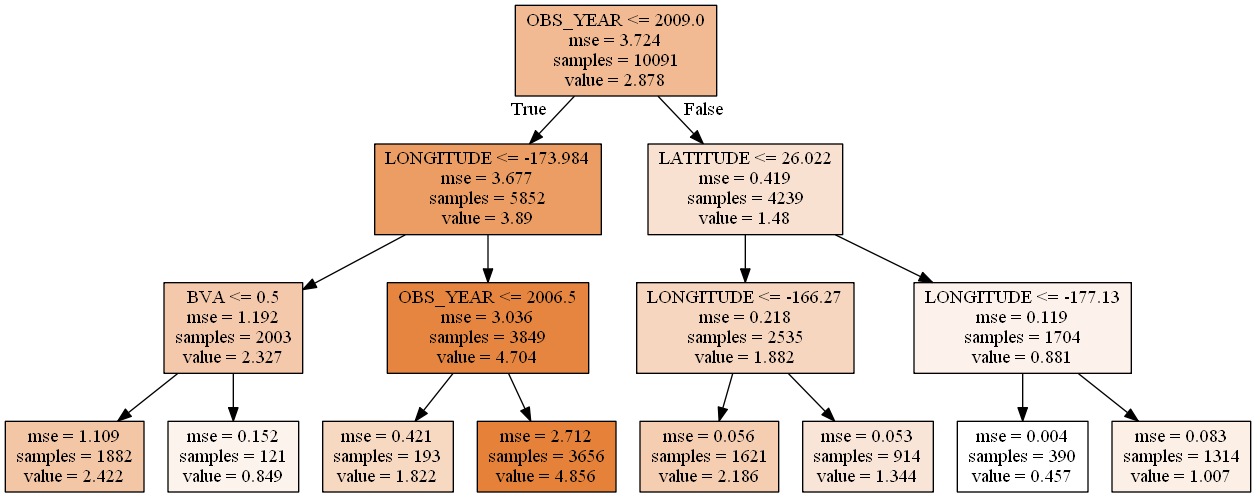

In [111]:
x_train, x_test, y_train, y_test = train_test_split(data_NW,target_NW, test_size=.3, random_state = 20)    

tree_NW = DecisionTreeRegressor(max_depth=3)
tree_NW.fit(data_NW, target_NW)


dot_data = tree.export_graphviz(
    tree_NW, out_file=None,
    feature_names= data_NW_names,
    filled=True
)




cross_variable_NW=cross_val_score(tree_NW, data_NW, target_NW, cv=10)
print('Cross Validation: \n', cross_variable_NW)
print ('Mean:', np.mean(cross_variable_NW))
print ('std:',np.std(cross_variable_NW))
print ('Regression score: \n', tree_NW.score(data_NW,target_NW))

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Cross Validation: 
 [ -0.23086698  -0.68232338  -0.02294144  -0.5011617   -1.83798985
  -1.15797728  -1.16245421 -18.18641909  -0.14736854  -0.01968762]
Mean: -2.3949190093535013
std: 5.293888417968346
Regression score: 
 0.3096593488188356


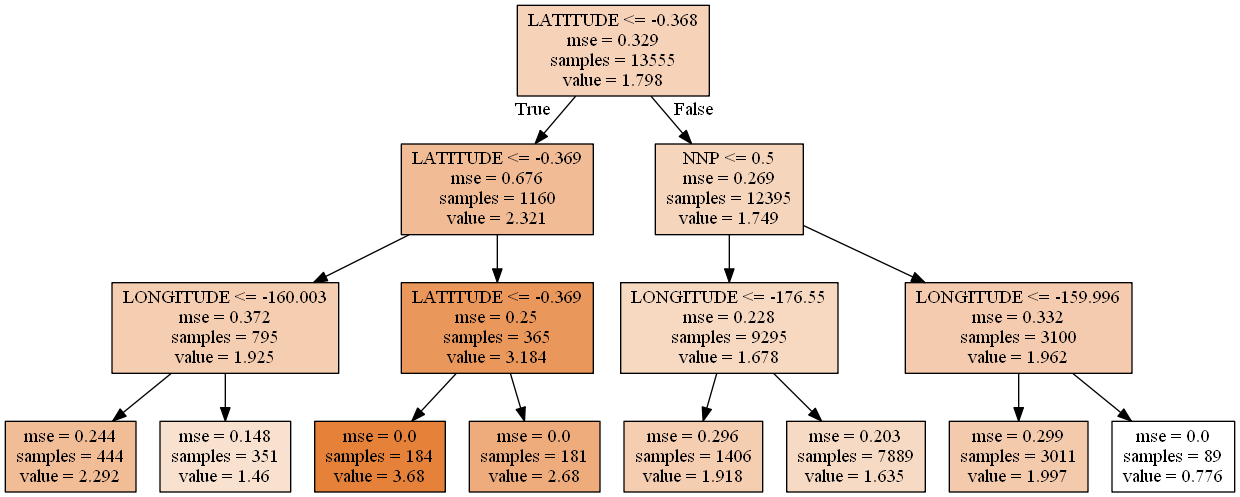

In [114]:
x_train, x_test, y_train, y_test = train_test_split(data_PRI,target_PRI, test_size=.3, random_state = 20)    

tree_PRI = DecisionTreeRegressor(max_depth=3)
tree_PRI.fit(data_PRI, target_PRI)


dot_data = tree.export_graphviz(
    tree_PRI, out_file=None,
    feature_names= data_PRI_names,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

cross_variable_PRI=cross_val_score(tree_PRI, data_PRI, target_PRI, cv=10)
print('Cross Validation: \n', cross_variable_PRI)
print ('Mean:', np.mean(cross_variable_PRI))
print ('std:',np.std(cross_variable_PRI))
print ('Regression score: \n', tree_PRI.score(data_PRI,target_PRI))

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Log Regression

In [162]:
bnb = BernoulliNB() 
lr=LogisticRegression(C=1e9)

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)
print(lr.fit(data,target))
print('Log Regression:', lr.fit(x_train, y_train).score(x_test, y_test))
print(bnb.fit(data, target))
print('BNB Regression:', bnb.fit(x_train, y_train).score(x_test, y_test))

ValueError: Unknown label type: (array([ 6.875,  6.875,  6.875, ..., 59.   , 59.   , 59.   ]),)

In [823]:
print ('Bernoulli prediction:', bnb.predict(data))
print('Log regr prediction:', lr.predict(data))

Bernoulli prediction: [1 1 1 ... 2 2 2]
Log regr prediction: [1 1 1 ... 1 1 1]


## Ridge Regression

In [171]:
ridgeregr = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridgeregr.fit(data, target)

cross_variable=cross_val_score(ridgeregr, data, target, cv=10)
print('Cross Validation, all data: \n', cross_variable)
print ('Mean all data:', np.mean(cross_variable))
print ('Stdv all data:',np.std(cross_variable))
print('Coefficients all data: \n', ridgeregr.coef_)
print('Intercept all data: \n', ridgeregr.intercept_)
print ('Regression score, all data: \n', ridgeregr.score(data,target))

ridge_NW = linear_model.Ridge(alpha = 10 , fit_intercept = False)
ridge_NW.fit(data_NW, target_NW)

cross_variable_NW=cross_val_score(ridge_NW, data_NW, target_NW, cv=10)
print('Cross Validation, NW: \n', cross_variable_NW)
print ('Mean, NW:', np.mean(cross_variable_NW))
print ('STdv NW:',np.std(cross_variable_NW))
print('Coefficients, NW: \n', ridge_NW.coef_)
print('Intercept, NW: \n', ridge_NW.intercept_)
print ('Regression score, NW: \n', ridge_NW.score(data_NW,target_NW))

ridge_PRI = linear_model.Ridge(alpha = 10 , fit_intercept = False)
ridge_PRI.fit(data_PRI, target_PRI)

cross_variable_PRI=cross_val_score(ridge_PRI, data_PRI, target_PRI, cv=10)
print('Cross Validation, PRI: \n', cross_variable_PRI)
print ('Mean, PRI:', np.mean(cross_variable_PRI))
print ('STdv PRI:',np.std(cross_variable_PRI))
print('Coefficients, PRI: \n', ridge_PRI.coef_)
print('Intercept, PRI: \n', ridge_PRI.intercept_)
print ('Regression score, PRI: \n', ridge_PRI.score(data_PRI,target_PRI))

Cross Validation, all data: 
 [ 0.23916061 -1.33546815  0.1932328  -6.87497211 -3.20038079 -0.02948008
 -2.30495854 -0.11133237 -0.18449666 -4.47048771]
Mean all data: -1.8079182993763392
Stdv all data: 2.2813461375727018
Coefficients all data: 
 [ 3.46731702e-02 -1.54486190e+00  6.12682724e-02 -8.80724527e+00
 -8.60559751e+00  4.74543449e+01 -9.41470724e+00  4.28159082e+00
 -1.51522612e-01 -1.02864476e+00  1.52867080e+00 -1.40544767e+00
  3.39782689e+00  3.73391084e-01 -3.10212446e+00  2.62709562e+00
  1.60070895e+00  1.30869668e+00  4.06191909e+00 -4.12522771e+00
  3.04390165e+00  4.78202695e+00  8.13916380e-01  2.62001722e+00
 -3.41177520e+01 -3.32839491e+01 -3.70475906e+01  2.34502119e+01
 -9.51872670e+00 -1.49183147e+01 -8.07804105e+00 -3.80187413e+00
  1.11874823e+01  1.57379173e+01 -8.82522484e+00 -1.30555834e+01
  2.52274946e+01 -2.83271599e+01  1.90653803e+01  1.47800252e+01
 -2.71545182e+01  1.82836748e+01  1.17114071e+01 -2.50415471e+01
 -2.04537334e+01  2.07595765e+01  4.80

In [172]:
from sklearn.naive_bayes import MultinomialNB
MNB= MultinomialNB()

MNB.fit(data, target).score(data, target)

ValueError: Unknown label type: (array([ 6.875,  6.875,  6.875, ..., 59.   , 59.   , 59.   ]),)

## Seems like Log and BNB regressions perform really well and linear regression and ridge regressions consistently perform poorly.

In [327]:
from ndbc import Station
from datetime import datetime

In [183]:
Buoys = {'Guam': 52202, 'Santa Rosa': 46069, 'Wake': WAKP8, 'Hawaii': 51206, 'Kauai': 51208, 'Kaula': 51208, 'Lanai': 51213,
         'Lehua': 51208, 'Maui':51205, 'Molokai': 51026, 'Niihau':51208, 'Oahu': 51202, 'French Frigate': 'sndp5',  
         'Kure': 'sndp5', 'Laysan': 'sndp5', 'Lisianski': 'sndp5', 'Maro': 'sndp5', 'Midway': 'sndp5', 'Necker': 'sndp5',
         'Pearl & Hermes': 'sndp5', 'Baker': 51310 , 'Howland': 51310, 'Jarvis': 51023 
         'Johnston' 'Kingman' 'Palmyra' 'Ofu & Olosega': NSTP6  'Rose':'NSTP6', 'Swains': 'nstp6',
 'Tau': 'nstp6', 'Tutuila': 'nstp6', 'Agrihan': 91222 'Aguijan':52200 'Alamagan' 'Asuncion'
 'Farallon de Pajaros' 'Guguan' 'Maug' 'Pagan' 'Rota': 52200, 'Saipan': 52200, 'Sarigan'
 'Tinian': 52200}


In [70]:
Region_dict = {'Pacific Remote Island' :'wakp8', 
               'Main Hawaiian Islands': 51202, 
               'Northwestern Hawaiian Islands':'sndp5', 
               'American Samoa': 'nstp6', 
               'Mariana Archipelago': 52200
              }


In [331]:
#Created new column of dictionary values

df['REGION_NAME'] = df.REGION_NAME.str.replace('Pacific Remote Island', 'wakp8').str.replace('Main Hawaiian Islands', '51202').str.replace('Northwestern Hawaiian Islands','sndp5').str.replace('American Samoa', 'nstp6').str.replace('Mariana Archipelago', '52200')

C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
#df_agg['BuoyNo'] = df_agg['ISLAND'].map(Buoys)
#print(df_agg.describe())

            OBJECTID        ROUNDID    SITEVISITID       LATITUDE  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean   127142.162155      47.270378    2720.260377      11.790533   
std     79747.018105      13.621488    1145.527734      14.384323   
min         7.000000       1.000000     740.000000     -14.559639   
25%     57216.000000      38.000000    1800.000000       0.814666   
50%    109236.000000      42.000000    2517.000000      18.096650   
75%    203166.000000      59.000000    3485.000000      21.889760   
max    257626.000000      68.000000    5058.000000      28.453650   

           LONGITUDE        MIN_Z_M        MAX_Z_M       OBS_YEAR  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean      -85.846523      10.871815      13.363007    2009.736442   
std       138.954342       4.046064       4.255341       1.554034   
min      -178.378433       1.000000       1.000000    2005.000000   
25%      -170.759450       9.0000

In [332]:
print (Station('wakp8').wtmp)

[]


In [333]:
list_of_stations =[]
for number in df['REGION_NAME']:
    list_of_stations.append(Station(number,datetime(2006,1,1), datetime(2012,5,19)))
    
    #not working because values are not separated from dict keys?

ValueError: Station wakp8 Areas not found in http://www.ndbc.noaa.gov/data/stations/station_table.txt

## Need a code to say for the date and the station, give the ave temp of the day or give the temp at noon or something.

dict_temp_series = {}
for x in df['Reg_buoy']:
    for y in df['DATE_']:
        dict_temp_series[station.name] = pd.Series(data=station.wtmp, index=station.time)

In [967]:
#list_of_stations = []
#for number in ['wakp8', 51202, 'sndp5', 'nstp6', 52200]:
#    list_of_stations.append(Station(number,datetime(2006,1,1), datetime(2012,5,19)))

In [946]:
list_of_station_series = []
for station in list_of_stations:
  list_of_station_series.append(pd.Series(data=station.wtmp, index=station.time, name=station.name))

In [947]:
dict_of_station_series = {}
for station in list_of_stations:
  dict_of_station_series[station.name] = pd.Series(data=station.wtmp, index=station.time)

In [948]:
df = pd.DataFrame(dict_of_station_series)
print(df)

                     1890000 - Wake Island  Mokapu Point, HI (098)  \
2006-01-01 00:00:00                   27.4                    25.8   
2006-01-01 00:06:00                   27.4                     NaN   
2006-01-01 00:12:00                   27.4                     NaN   
2006-01-01 00:18:00                   27.4                     NaN   
2006-01-01 00:24:00                   27.4                     NaN   
2006-01-01 00:30:00                   27.4                     NaN   
2006-01-01 00:36:00                   27.4                     NaN   
2006-01-01 00:42:00                   27.4                     NaN   
2006-01-01 00:48:00                   27.4                     NaN   
2006-01-01 00:54:00                   27.4                     NaN   
2006-01-01 01:00:00                   27.4                    25.8   
2006-01-01 01:06:00                   27.5                     NaN   
2006-01-01 01:12:00                   27.5                     NaN   
2006-01-01 01:18:00 

In [949]:
df.groupby(pd.Grouper(freq="M")).count()

,1890000 - Wake Island,"Mokapu Point, HI (098)","1619910 - Sand Island, Midway Islands","1770000 - Pago Pago, American Samoa","Ipan, Guam (121)"
2006-01-31,7070,741,7268,0,736
2006-02-28,6188,665,6234,0,662
2006-03-31,7296,739,7309,7325,731
2006-04-30,6652,700,6649,6670,700
2006-05-31,7303,744,7291,7337,744
2006-06-30,6978,714,6979,2009,713
2006-07-31,7173,618,7216,4172,742
2006-08-31,6988,688,6994,7006,740
2006-09-30,0,718,6959,6628,718
2006-10-31,6053,725,7092,7122,744
